In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_pickle('ds1_reads.pkl')
#conda activate wp

In [2]:
data.describe()
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907952 entries, 0 to 7907951
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transcript_id        object 
 1   transcript_position  object 
 2   sequence             object 
 3   dwell_time           float64
 4   sd                   float64
 5   mean                 float64
 6   m1_seq               object 
 7   m1_dtime             float64
 8   m1_sd                float64
 9   m1_mean              float64
 10  p1_seq               object 
 11  p1_dtime             float64
 12  p1_sd                float64
 13  p1_mean              float64
 14  gene_id              object 
 15  label                float64
dtypes: float64(10), object(6)
memory usage: 965.3+ MB


,transcript_id,transcript_position,sequence,dwell_time,sd,mean,m1_seq,m1_dtime,m1_sd,m1_mean,p1_seq,p1_dtime,p1_sd,p1_mean,gene_id,label
0,ENST00000000233,244,AGACC,0.00640,3.90,127.0,AAGAC,0.00465,2.16,127.0,GACCA,0.00797,8.75,83.7,ENSG00000004059,0.0
1,ENST00000000233,244,AGACC,0.01860,10.00,123.0,AAGAC,0.02690,4.43,106.0,GACCA,0.00863,6.20,80.0,ENSG00000004059,0.0
2,ENST00000000233,244,AGACC,0.01200,8.26,125.0,AAGAC,0.00432,3.10,108.0,GACCA,0.01590,2.89,78.7,ENSG00000004059,0.0
3,ENST00000000233,244,AGACC,0.01750,8.51,128.0,AAGAC,0.00996,4.52,123.0,GACCA,0.00498,2.63,80.0,ENSG00000004059,0.0
4,ENST00000000233,244,AGACC,0.00772,4.22,126.0,AAGAC,0.00764,2.81,124.0,GACCA,0.00474,5.84,80.9,ENSG00000004059,0.0




#some questions to be answered:

Basic counts: 

1. which sequences have the highest counts? 

2. which transcript_positions have the highest counts? 

3. which gene_ids have the highest counts of label1? (not for dataset1-3）

4. can we get a heatmap to see what are the relationships among the predictors? 



About sequences:

1. how many are there? 

2. Compare the mean dwell time&other metrics? 
    is there any relationship between? 

3. what is the proportion of modification? 



About modified vs unmodified: (not for dataset1-3 ）

1. what are the metric differences at -1, 0, 1? 







Which sequences have highest counts? 

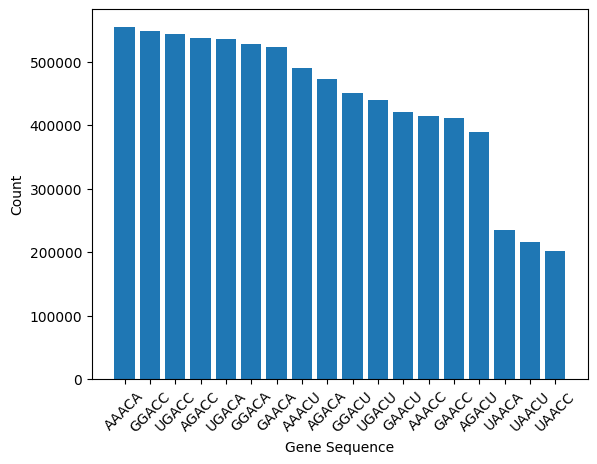

In [3]:
sequence_groups = data.groupby('sequence')
sequence_stats = sequence_groups.size().reset_index(name='counts').sort_values(by='counts', ascending=False)
plt.bar(sequence_stats['sequence'], sequence_stats['counts'])
plt.xlabel('Gene Sequence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In Frequencies: 

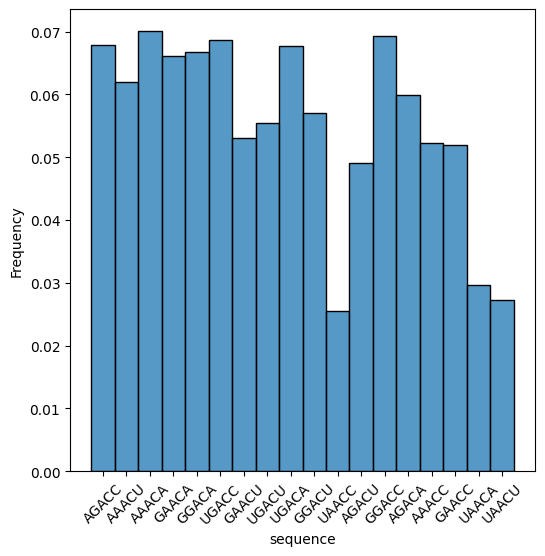

In [4]:
plt.figure(figsize=(6, 6)) 
sns.histplot(x='sequence',data=data,stat="probability")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

In [51]:
#Heatmap optional: runtime is too long
sns.heatmap(data=data.select_dtypes(exclude=['object']),annot=True)
plt.show()

Numerical features comparison among the sequences: 

   sequence  dwell_time_average  mean_average  sd_average  dwell_time_std  \
0     AAACA            0.007112     98.876184    3.075753        0.004862   
1     AAACC            0.007263     99.266560    3.705178        0.005080   
2     AAACU            0.007743    106.078075    2.855479        0.005287   
3     AGACA            0.009872    126.366619    5.886782        0.005948   
4     AGACC            0.010049    127.324739    5.569188        0.006226   
5     AGACU            0.009829    130.677302    5.065053        0.005792   
6     GAACA            0.007546     95.896779    3.257465        0.004646   
7     GAACC            0.007147     94.698729    3.878485        0.004333   
8     GAACU            0.007356    100.808170    3.356345        0.004658   
9     GGACA            0.008873    118.012874    7.180571        0.006236   
10    GGACC            0.009134    119.556251    6.991147        0.006414   
11    GGACU            0.009200    122.916993    5.582989        0.005866   

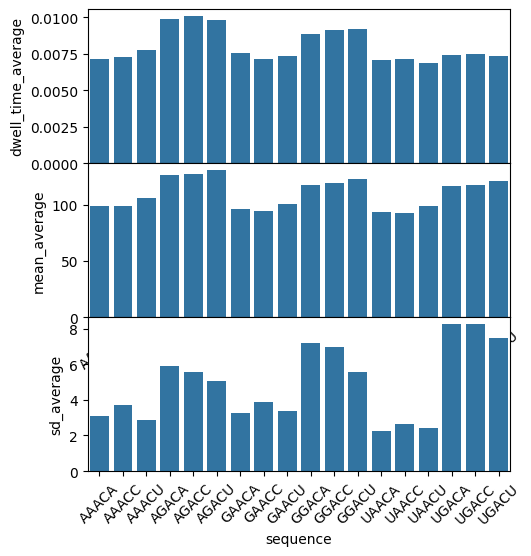

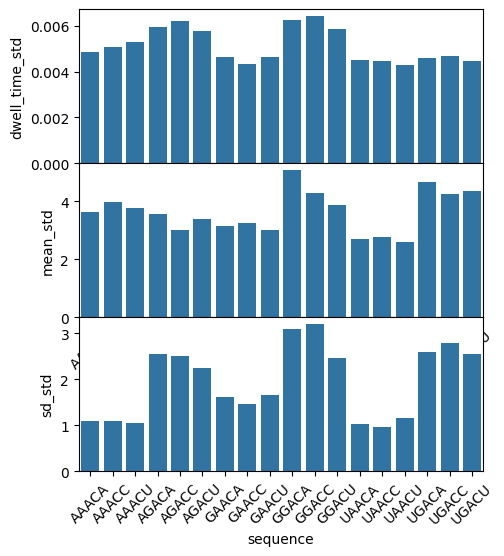

In [7]:

from matplotlib import gridspec

# Create a custom color palette for the labels
sequences_groups = data.groupby(['sequence'])
means=sequences_groups[['dwell_time','mean','sd']].mean()
variances=sequences_groups[['dwell_time','mean','sd']].std()
joined_data=means.join(variances,lsuffix='_average',rsuffix='_std').reset_index()
print(joined_data)
# Create a figure and gridspec

fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(3, 2, height_ratios=[3, 3, 3], width_ratios=[2, 2])
ax0 = plt.subplot(gs[0,0])
sns.barplot(x='sequence',y='dwell_time_average',data=joined_data)
plt.xticks(rotation=45)

ax1 = plt.subplot(gs[1,0])
sns.barplot(x='sequence',y='mean_average',data=joined_data)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=45)

ax2 = plt.subplot(gs[2,0])
sns.barplot(x='sequence',y='sd_average',data=joined_data)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.0)
plt.show()

fig = plt.figure(figsize=(12, 6)) 

ax3 = plt.subplot(gs[0,1])
sns.barplot(x='sequence',y='dwell_time_std',data=joined_data)
plt.xticks(rotation=45)

ax4 = plt.subplot(gs[1,1])
sns.barplot(x='sequence',y='mean_std',data=joined_data)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(rotation=45)

ax5 = plt.subplot(gs[2,1])
sns.barplot(x='sequence',y='sd_std',data=joined_data)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.0, wspace=0.3)
plt.show()
